<a href="https://colab.research.google.com/github/Baroka-wp/dive_ML/blob/master/Sprint5_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

## 【problem 1】Lagrange's steepest descent by the undetermined multiplier method


Formellement, un SVM consiste en un hyperplan séparant au maximum qui peut être utilisé pour classer les données. Alors que les SVM peuvent exister dans n'importe quel nombre de dimensions, un modèle bidimensionnel simple sera utilisé comme exemple ici car il est facile à visualiser. Dans cet ensemble de données, les échantillons ont deux entités afin que chacune puisse être tracée dans le plan XY comme indiqué ci-dessous. Les classes d'échantillons sont représentées par la couleur du point.

> L'idée principale du SVM est de trouver l'hyperplan séparant au maximum.


## 【problem 2】Support vector determination


### Objectif SVM

Un ensemble d'apprentissage, S , pour un SVM est composé de m échantillons. Les caractéristiques, x , sont constituées de nombres réels et les classifications, y , doivent être -1 ou 1.

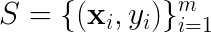

L'hypervoie SVM est définie par le vecteur de poids, w , et le biais, b , et est définie comme :

image.png

L'incorporation du biais est expliquée plus en détail à la section 4.
Dans l'exemple à 2 fonctionnalités, cela peut être réécrit comme suit :


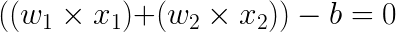


##【problem 3】Estimated


In [23]:
class ScratchSVMClassifier():
    """
    SVM分類器のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    kernel : str
      カーネルの種類。線形カーネル（linear）か多項式カーネル（polly）
    threshold : float
      サポートベクターを選ぶための閾値
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.n_support_vectors : int
      サポートベクターの数
    self.index_support_vectors : 次の形のndarray, shape (n_support_vectors,)
      サポートベクターのインデックス
    self.X_sv :  次の形のndarray, shape(n_support_vectors, n_features)
      サポートベクターの特徴量
    self.lam_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターの未定乗数
    self.y_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターのラベル

    """

    def __init__(self, num_iter, lr, kernel='linear', threshold=1e-5, verbose=False,degree= 1, gamma=1, weigth = 0):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose
        self.degree = degree
        self.gamma = gamma
        self.weigth = weigth


    def fit(self, X, y, X_val=None, y_val=None):
        """
        SVM分類器を学習する。検証データが入力された場合はそれに対する精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        self.label = np.unique(y)
        y_ = np.where(y== self.label[0], -1,1)
        
        self.lamda = np.random.rand(len(X))

        for i in range(self.iter):
          self._update_lambda(X,y)
          if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print("iteration: {}, lamda: {}".format(i,self.lamda))

        self.X_index = np.where(self.lamda > self.threshold)[0]
        self.X_sv = X[self.X_index,:]
        self.y_sv = y_[self.X_index].reshape(-1,1)
        self.lambda_sv = self.lamda[self.X_index].reshape(-1,1)
        self.n_support_vectors = len(self.lambda_sv)
        pass

    def predict(self, X):
        """
        SVM分類器を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            échantillon

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            SVM分類器による推定結果
        """
        n = X.shape[0]
        y_pred = np.zeros(n)
        
        for i in range(n):
            temp = 0
            for j in range(self.n_support_vectors):
                temp += self.lambda_sv[j]*self.y_sv[j]*self._kernel(X[i],self.X_sv[j])
            if temp >= 0:
                y_pred[i] = self.label[1]
            else:
                y_pred[i] = self.label[0]
                
        return y_pred

    def _update_lambda(self, X, y):
        """
        Update parameter lambda during training process
        Parameters
        -----------
        X: input data, ndarray (n_samples, n_features)
        y: label data, ndarray (n_samples,)
        """
        n = X.shape[0]
        
        for i in range(n):
            update_sum = 0
            for j in range(n):
                update_sum += self.lamda[j]*y[i]*y[j]*self._kernel(X[i],X[j]) 
            self.lamda[i] += self.lr*(1-update_sum)
            if self.lamda[i] < 0:
                self.lamda[i] = 0
                
    def _kernel(self, X_i, X_j):
        """
        Compute the result when applying kernel function to two samples
        Parameters
        ------------
        X_i, X_j: (n_features,) ndarray
        """
        if self.kernel =='polly':
          self.gamma = 1
          self.theta = 1
        return (self.gamma*np.dot(X_i,X_j.T) + self.weigth)**self.degree



## [Problem 4] Learning and estimation

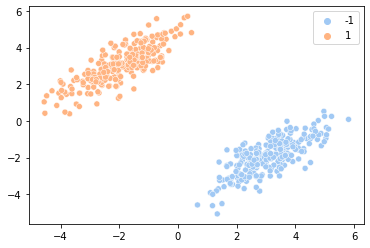

In [8]:
np.random.seed(0)
n_samples = 500
feature_0 = [-2, 3]
feature_1 = [3, -2]
cov = [[1.0,0.8], [0.8, 1.0]]
feature_0 = np.random.multivariate_normal(feature_0, cov, n_samples // 2)
feature_1 = np.random.multivariate_normal(feature_1, cov, n_samples // 2)
X = np.concatenate([feature_0, feature_1])
y = np.concatenate([
    np.full(n_samples // 2, 1),
    np.full(n_samples // 2, -1)
])


## plot
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y, palette="pastel" )
plt.show()

### Estimate with scratchSVMClassifier

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,train_size =0.75)
model = ScratchSVMClassifier(num_iter=100,lr=0.01,verbose=False)
model.fit(X_train,y_train)

In [30]:
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))

1.0


### Estimate with sklearn

In [29]:
svm = SVC()
svm.fit(X_train,y_train)
y_smv = svm.predict(X_test)
print("accuracy: {}".format(accuracy_score(y_test,y_smv)))

accuracy: 1.0


## [Problem 5] Visualization of decision area


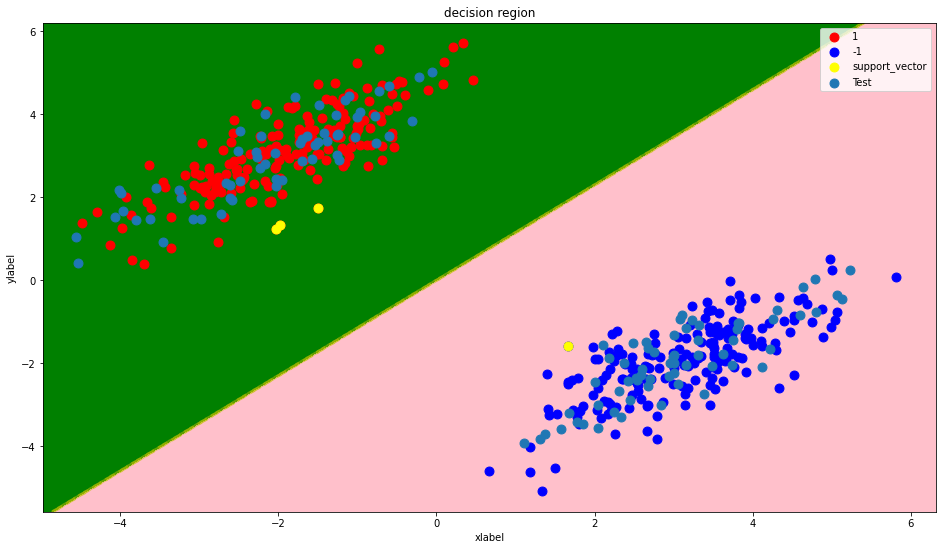

In [39]:
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['1', '-1']):
    """
    Dessinez la zone de détermination du modèle qui a appris la classification binaire avec des caractéristiques bidimensionnelles.
    La couleur de fond est dessinée à partir des valeurs estimées du modèle entraîné.
    Les points du nuage de points sont des données de formation ou de validation.
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'green']
    n_class = 2
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.scatter(model.X_sv[:,0], model.X_sv[:,1], color='yellow', s=80, label='support_vector')
    plt.legend(handles=patches)
    plt.legend()

fig, ax = plt.subplots(figsize=(16,9))
decision_region(X_train,y_train,model)
plt.scatter(X_test[:,0], X_test[:,1], s=80, label="Test")
plt.legend();

## [Problem 6] (Advance task) Creation of polynomial kernel function


In [37]:
model2 = ScratchSVMClassifier(num_iter=100,lr=0.01,verbose=False,kernel="polly",degree=2)
model2.fit(X_train,y_train)
y_pred_polly = model.predict(X_test)
print(accuracy_score(y_test,y_pred_polly))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:119: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:119: RuntimeWarning: invalid value encountered in double_scalars


1.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: UserWarning: No contour levels were found within the data range.


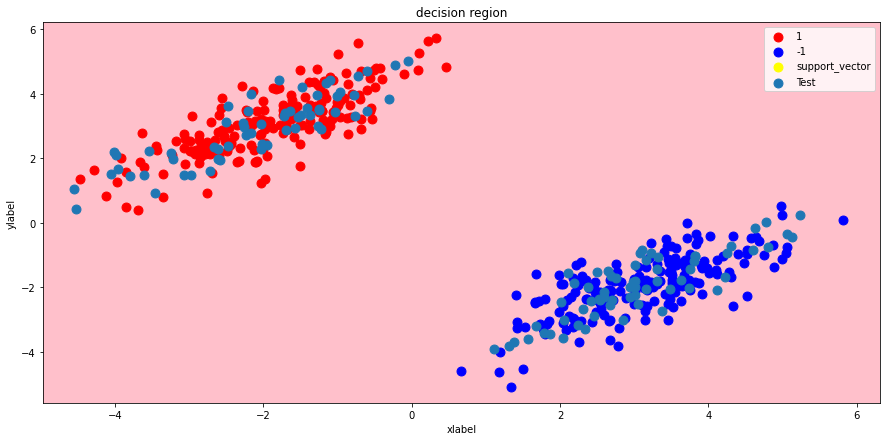

In [38]:
fig, ax = plt.subplots(figsize=(15,7))
decision_region(X_train,y_train,model2)
plt.scatter(X_test[:,0], X_test[:,1], s=80, label="Test")
plt.legend();